In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [99]:
df = pd.read_csv(r'C:\Users\user\Downloads\churn_dataset.csv',skipinitialspace=True)

In [100]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [101]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [102]:
df.shape
df.size
df.info()

(7043, 21)

147903

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

### Check for duplicates

In [103]:
df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

False    7043
dtype: int64

- There are no duplicates in the dataframe

## Missing Values

In [104]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- There are 11 nan values in 'TotalCharges' columns

In [105]:
df.TotalCharges.mean()
df.TotalCharges.median()
df.TotalCharges.mode()[0]

2283.3004408418656

1397.475

20.2

In [106]:
x = df.TotalCharges.median()
df.TotalCharges.fillna(x,inplace=True)

- Replacing the null values with median because mean will be affected by the outliers

In [107]:
df.TotalCharges[df.TotalCharges.isna()].sum()

0.0

In [108]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [109]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Checking Outliers

In [110]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

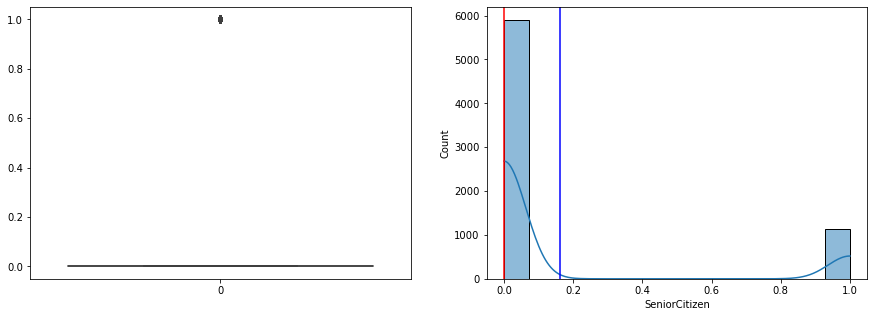

In [111]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.SeniorCitizen)

plt.subplot(122)
sns.histplot(df.SeniorCitizen,kde=True)
plt.axvline(df.SeniorCitizen.mean(),color='blue')
plt.axvline(df.SeniorCitizen.median(),color='red');

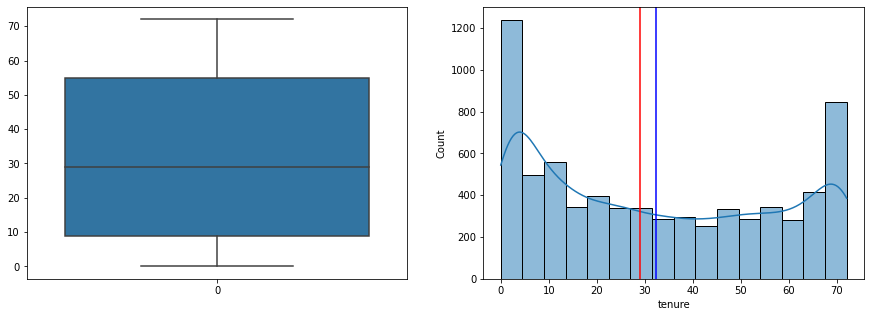

In [112]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.tenure)

plt.subplot(122)
sns.histplot(df.tenure,kde=True)
plt.axvline(df.tenure.mean(),color='blue')
plt.axvline(df.tenure.median(),color='red');

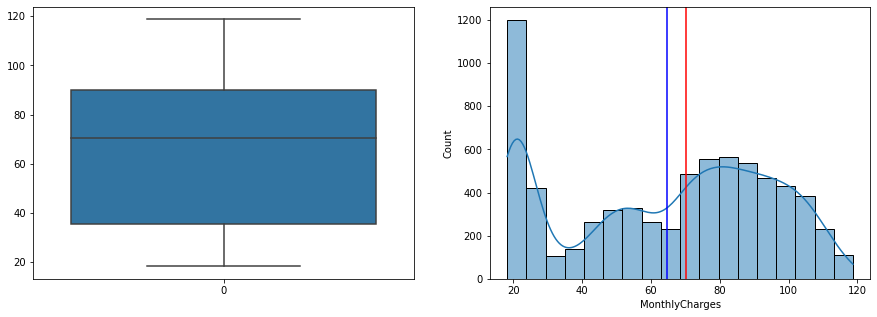

In [113]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.MonthlyCharges)

plt.subplot(122)
sns.histplot(df.MonthlyCharges,kde=True)
plt.axvline(df.MonthlyCharges.mean(),color='blue')
plt.axvline(df.MonthlyCharges.median(),color='red');

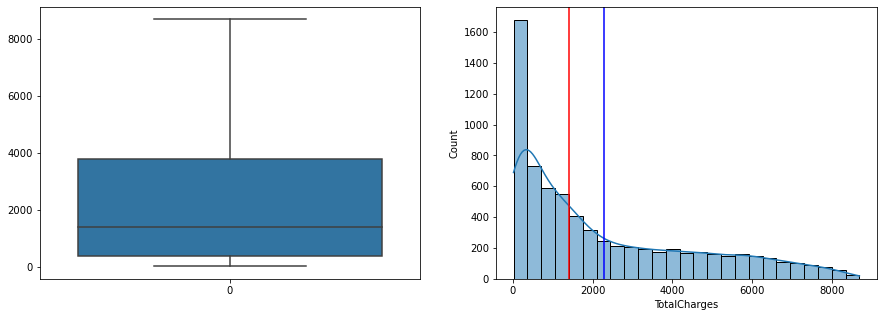

In [114]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.TotalCharges)

plt.subplot(122)
sns.histplot(df.TotalCharges,kde=True)
plt.axvline(df.TotalCharges.mean(),color='blue')
plt.axvline(df.TotalCharges.median(),color='red');


## Analysis

In [115]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


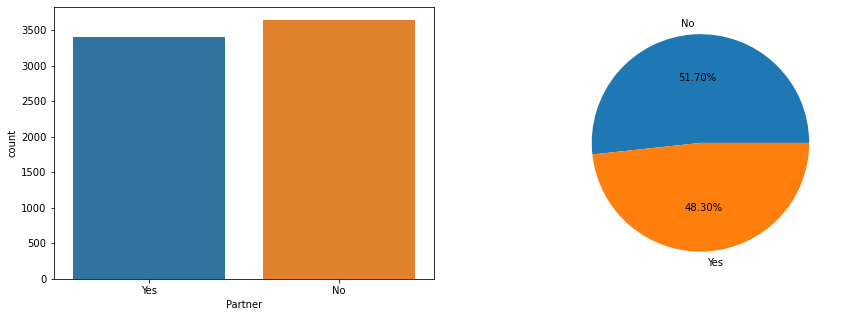

In [116]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.Partner)
plt.subplot(122)
plt.pie(df.Partner.value_counts().values,labels=df.Partner.value_counts().index,autopct='%.2f%%');

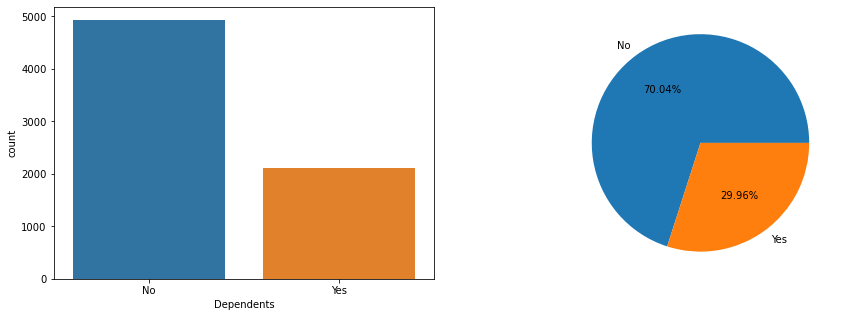

In [117]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.Dependents)
plt.subplot(122)
plt.pie(df.Dependents.value_counts().values,labels=df.Dependents.value_counts().index,autopct='%.2f%%');

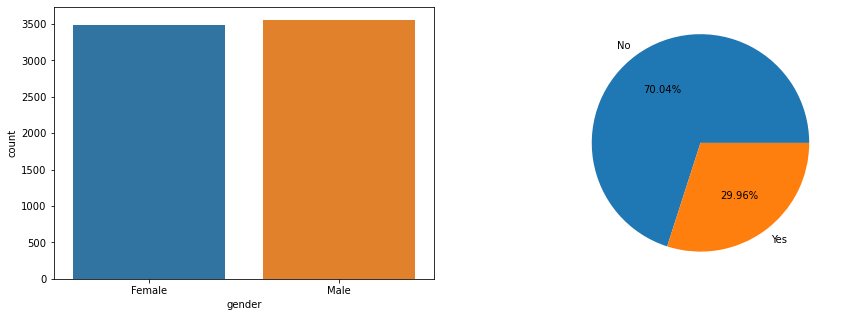

In [118]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.gender)
plt.subplot(122)
plt.pie(df.Dependents.value_counts().values,labels=df.Dependents.value_counts().index,autopct='%.2f%%');

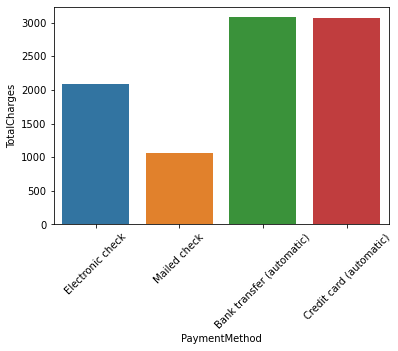

In [119]:
sns.barplot(x=df.PaymentMethod,y=df.TotalCharges,ci=False)
plt.xticks(rotation=45);

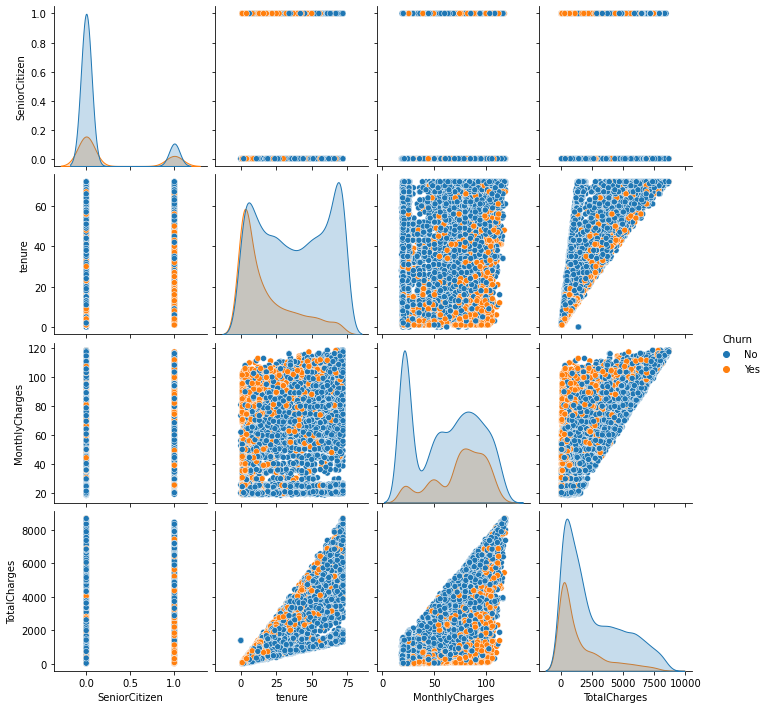

In [120]:
sns.pairplot(df,hue='Churn');

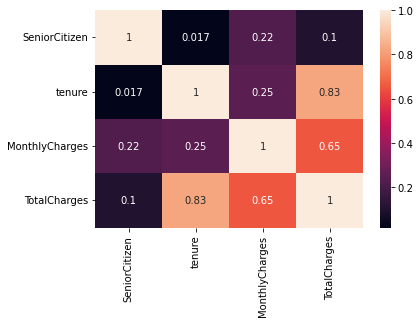

In [121]:
sns.heatmap(df.corr(),annot=True);

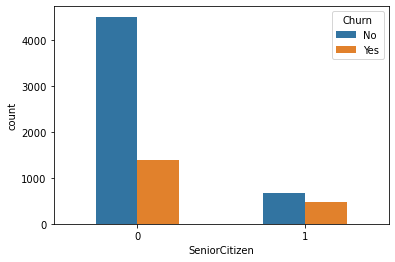

In [122]:
sns.countplot(x=df.SeniorCitizen, hue=df.Churn,width=0.5);

- From Exploratory data analysis the observations are:
- The company mainly needs to focus on Non senior citigens.
- The customers who don't have partner and dependends or more likely to churnout when compared to who are having partner.

## Data Preparation

### a.Identify the target variable and spliting the data into train and test

In [123]:
import sklearn

In [124]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [125]:
# Identifying the inputs(X) and outputs(y) 

y=df['Churn']
X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [194]:
# Split into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=50)

In [195]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5368,Female,1,No,No,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,235.50
6823,Female,0,No,No,4,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.55,235.65
4861,Female,1,Yes,No,48,Yes,No,DSL,No,Yes,No,No,No,Yes,One year,Yes,Bank transfer (automatic),58.95,2789.70
4132,Female,0,No,No,13,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.90,300.80
5832,Male,0,Yes,Yes,20,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.45,1470.95


In [196]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


### b.Separating categorical and numerical columns

In [197]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5368,Female,1,No,No,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,235.50
6823,Female,0,No,No,4,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.55,235.65
4861,Female,1,Yes,No,48,Yes,No,DSL,No,Yes,No,No,No,Yes,One year,Yes,Bank transfer (automatic),58.95,2789.70
4132,Female,0,No,No,13,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.90,300.80
5832,Male,0,Yes,Yes,20,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.45,1470.95


In [198]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5368,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
6823,Female,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
4861,Female,Yes,No,Yes,No,DSL,No,Yes,No,No,No,Yes,One year,Yes,Bank transfer (automatic)
4132,Female,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
5832,Male,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [199]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5368,1,3,70.30,235.50
6823,0,4,50.55,235.65
4861,1,48,58.95,2789.70
4132,0,13,23.90,300.80
5832,0,20,70.45,1470.95


### c.Scaling the numerical features

In [200]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)
X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5368,2.241162,-1.199777,0.192560,-0.902564
6823,-0.446197,-1.158926,-0.462599,-0.902498
4861,2.241162,0.638520,-0.183949,0.226446
4132,-0.446197,-0.791267,-1.346649,-0.873700
5832,-0.446197,-0.505309,0.197536,-0.356469


In [201]:
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.166036,32.369557,64.495220,2277.402793
std,0.372148,24.481499,30.148212,2262.550097
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.162500,405.787500
50%,0.000000,29.000000,70.150000,1395.525000
75%,0.000000,55.000000,89.800000,3778.662500
max,1.000000,72.000000,118.650000,8684.800000


### d.Applying OneHotEncoding on Categorical Columns

In [202]:
X_train_Cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5368,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
6823,Female,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
4861,Female,Yes,No,Yes,No,DSL,No,Yes,No,No,No,Yes,One year,Yes,Bank transfer (automatic)
4132,Female,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
5832,Male,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [203]:
X_train_cat['gender'].value_counts(normalize=True)

Female    0.500947
Male      0.499053
Name: gender, dtype: float64

In [204]:
X_train_cat['Partner'].value_counts(normalize=True)

No     0.514199
Yes    0.485801
Name: Partner, dtype: float64

In [205]:
X_train_cat['Dependents'].value_counts(normalize=True)

No     0.697463
Yes    0.302537
Name: Dependents, dtype: float64

In [206]:
X_train_cat['PhoneService'].value_counts(normalize=True)

Yes    0.899849
No     0.100151
Name: PhoneService, dtype: float64

In [207]:
X_train_cat['MultipleLines'].value_counts(normalize=True)

No                  0.479175
Yes                 0.420674
No phone service    0.100151
Name: MultipleLines, dtype: float64

In [208]:
X_train_cat['InternetService'].value_counts(normalize=True)

Fiber optic    0.434495
DSL            0.346460
No             0.219046
Name: InternetService, dtype: float64

In [209]:
X_train_cat['OnlineSecurity'].value_counts(normalize=True)

No                     0.498485
Yes                    0.282469
No internet service    0.219046
Name: OnlineSecurity, dtype: float64

In [210]:
X_train_cat['OnlineBackup'].value_counts(normalize=True)

No                     0.440553
Yes                    0.340401
No internet service    0.219046
Name: OnlineBackup, dtype: float64

In [211]:
X_train_cat['DeviceProtection'].value_counts(normalize=True)

No                     0.430329
Yes                    0.350625
No internet service    0.219046
Name: DeviceProtection, dtype: float64

In [212]:
X_train_cat['TechSupport'].value_counts(normalize=True)

No                     0.490345
Yes                    0.290610
No internet service    0.219046
Name: TechSupport, dtype: float64

In [213]:
X_train_cat['StreamingTV'].value_counts(normalize=True)

No                     0.396062
Yes                    0.384892
No internet service    0.219046
Name: StreamingTV, dtype: float64

In [214]:
X_train_cat['Contract'].value_counts(normalize=True)

Month-to-month    0.546573
Two year          0.244036
One year          0.209390
Name: Contract, dtype: float64

In [215]:
X_train_cat['PaperlessBilling'].value_counts(normalize=True)

Yes    0.588981
No     0.411019
Name: PaperlessBilling, dtype: float64

In [216]:
X_train_cat['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.329042
Mailed check                 0.231352
Bank transfer (automatic)    0.223211
Credit card (automatic)      0.216395
Name: PaymentMethod, dtype: float64

In [217]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                              columns=encoder.get_feature_names_out(X_train_cat.columns),
                              index = X_train_Cat.index)
X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5368,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6823,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4861,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4132,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5832,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### f.Concatinating the encoded categorical feature and rescaled numerical feature

In [218]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis=1)
X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5368,2.241162,-1.199777,0.192560,-0.902564,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6823,-0.446197,-1.158926,-0.462599,-0.902498,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4861,2.241162,0.638520,-0.183949,0.226446,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4132,-0.446197,-0.791267,-1.346649,-0.873700,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5832,-0.446197,-0.505309,0.197536,-0.356469,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### g.Preparing test data

In [219]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5585,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.30
3317,Male,0,Yes,No,63,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Credit card (automatic),70.80,4448.80
6875,Female,0,Yes,No,64,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,1208.60
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1758,Female,0,No,No,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.05,1386.90


In [220]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 5585 to 1974
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   int64  
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   objec

In [221]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5585,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check
3317,Male,Yes,No,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Credit card (automatic)
6875,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
6074,Male,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
1758,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [222]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5585,0,1,19.30,19.30
3317,0,63,70.80,4448.80
6875,0,64,19.45,1208.60
6074,0,1,23.45,23.45
1758,0,68,20.05,1386.90


In [223]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                             columns=encoder.get_feature_names_out(X_test_cat.columns),
                             index=X_test_cat.index)
X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5585,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3317,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6074,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1758,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [224]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5585,-0.446197,-1.281479,-1.499243,-0.998129
3317,-0.446197,1.251285,0.209146,0.959803
6875,-0.446197,1.292136,-1.494267,-0.472433
6074,-0.446197,-1.281479,-1.361577,-0.996294
1758,-0.446197,1.455541,-1.474364,-0.393621


In [225]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5585,-0.446197,-1.281479,-1.499243,-0.998129,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3317,-0.446197,1.251285,0.209146,0.959803,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6875,-0.446197,1.292136,-1.494267,-0.472433,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6074,-0.446197,-1.281479,-1.361577,-0.996294,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1758,-0.446197,1.455541,-1.474364,-0.393621,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Logistic Regression

In [226]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed,y_train)

LogisticRegression()

#### Prediction

In [227]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

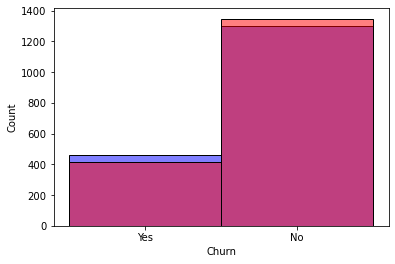

In [228]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

### Evaluation

In [229]:
# Calculate accuracy of class prediction

from sklearn import metrics
LC = metrics.accuracy_score(y_test,y_test_pred)
LC

0.7984099943214082

## Decision Tree Classifier

In [230]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [231]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

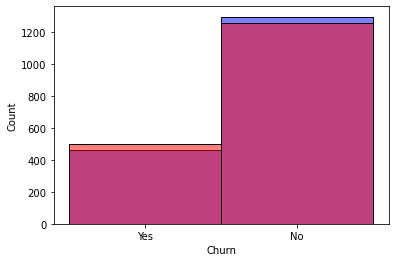

In [232]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [233]:
DTC = metrics.accuracy_score(y_test,y_test_pred)
DTC

0.7217490062464509

## KNN Classifier

In [234]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [257]:
 y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

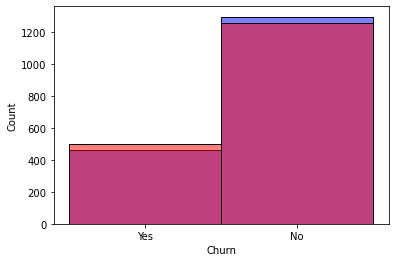

In [236]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [237]:
KNN = metrics.accuracy_score(y_test,y_test_pred)
KNN

0.7217490062464509

## Random Forest Classifier

In [238]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [239]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

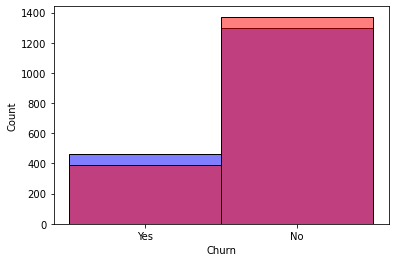

In [240]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [241]:
RFC = metrics.accuracy_score(y_test,y_test_pred)
RFC

0.7921635434412265

## Support vector Machines

In [242]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed,y_train)

SVC()

In [243]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

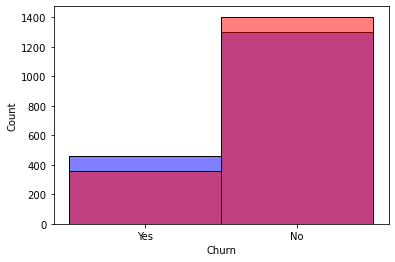

In [244]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [245]:
SVM = metrics.accuracy_score(y_test,y_test_pred)
SVM

0.7910278250993753

## Gradient Decision Boosting Tree

In [246]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed,y_train)

GradientBoostingClassifier()

In [247]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

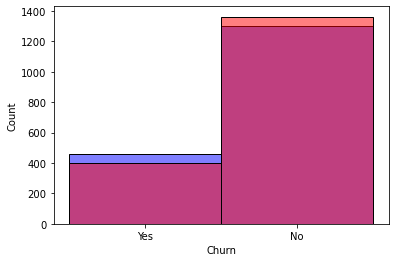

In [248]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [249]:
GBDT = metrics.accuracy_score(y_test, y_test_pred)
GBDT

0.7955706984667802

## AdaBoostClassifier

In [250]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train_transformed,y_train)

AdaBoostClassifier()

In [251]:
y_test_pred = ada.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

<AxesSubplot:xlabel='Churn', ylabel='Count'>

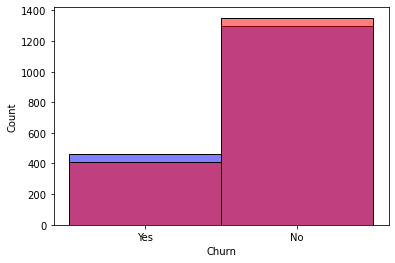

In [252]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [253]:
ABC = metrics.accuracy_score(y_test, y_test_pred)
ABC

0.7967064168086314

### Result

In [254]:
data = [['Logistic Classifier',LC],
       ['KNN Classifier',KNN],
       ['Decision Tree Classifier',DTC],
       ['Random Forest Classifier',RFC],
       ['Support vector Machines',SVM],
       ['Gradient Boosting Decision Tree Classifier',GBDT],
       ['AdaBoostClassifier',ABC]]
result = pd.DataFrame(data,columns = ['Algorithm','Accuracy_Score'])

In [255]:
result

,Algorithm,Accuracy_Score
0,Logistic Classifier,0.798410
1,KNN Classifier,0.721749
2,Decision Tree Classifier,0.721749
3,Random Forest Classifier,0.792164
4,Support vector Machines,0.791028
5,Gradient Boosting Decision Tree Classifier,0.795571
6,AdaBoostClassifier,0.796706


<AxesSubplot:xlabel='Accuracy_Score', ylabel='Algorithm'>

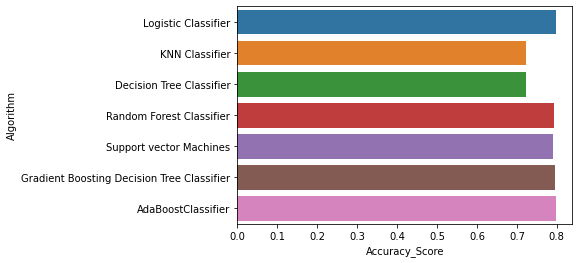

In [256]:
sns.barplot(y=result.Algorithm,x=result.Accuracy_Score)

### Conclusion

- By observing all the algorithms `Logistic Regression` is best model for Churn Prediction.
- Because `Logistic Regression` is giving more accuracy score 0.798410.